# Lecture

In [1]:
#загузка используемых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#сгененируем распределение
mu = 100
sigma = 10
population = np.round(np.random.normal(mu, sigma, 1000), 2)

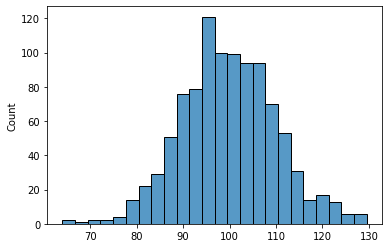

In [3]:
#Визуализируем график
sns.histplot(population, kde = False)

In [4]:
#Средене значние и стандартное отклонение
population.mean()
population.std()

10.13631538960287

In [5]:
#Получение выборочного среднего
sample_size = 30 #можно менять размер выбороки  и из-за этого будет меняться стандартная ошибка среднего
sample = np.random.choice(population, sample_size, False)
sample.mean()

98.42000000000002

In [6]:
n = 10000
sample_means = []
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_means.append(sample.mean())

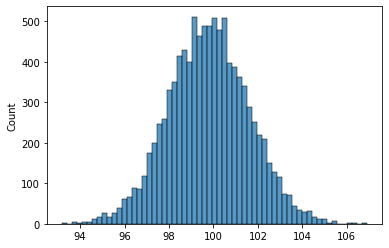

In [7]:
sns.histplot(sample_means, kde = False)

In [8]:
# правило трех сигм - 100% в этом диапазоне

# правило 1.96 сигм ~ 95% в этом диапазоне

# se = sigma / корень(n)

In [9]:
#Стандартная ошибка
se = population.std() / sample_size ** 0.5
se

1.8506295296240862

In [10]:
np.std(sample_means)

1.8015723996296222

In [11]:
# Диапазон, в котором лежит 95% наблюдений
population.mean() + 1.96 * se
population.mean() - 1.96 * se

96.1581161219368

In [12]:
sample_real = np.random.choice(population, sample_size, False)
sample_real

array([ 87.21,  99.2 ,  93.01,  92.36, 107.03, 121.71,  78.89,  86.14,
        98.94, 121.57, 113.29,  99.1 , 103.77,  91.4 , 113.09, 105.69,
       106.65,  96.67, 118.08,  84.03, 109.07,  92.07,  90.94,  98.08,
       106.08, 112.96,  92.22, 128.25,  98.53,  86.53])

In [13]:
sample_real.mean()
sample_real.std()
se = sample_real.std() / sample_size ** 0.5
se

2.2225088292954642

In [14]:
#как вычислить z значение
(104 - 100)/se # значение лежит правее на более чем 2 сигмы

1.7997678782081603

In [15]:
z_scores = []
n = 10000

mu = population.mean()
sigma = population.std()

se = sigma / sample_size ** 0.5

for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    
    z_score = (sample_mean - mu) / se
    z_scores.append(z_score)

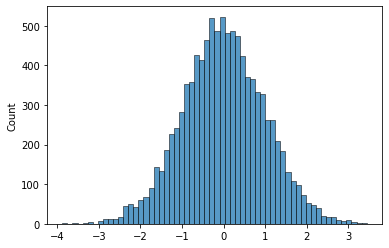

In [16]:
sns.histplot(z_scores, kde=False) # Z-распределение

In [17]:
#Рассчет z-значения для конкретной выборки

t_scores = []

n = 10000
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    sample_std = sample.std()
    
    se = sample_std / sample_size ** 0.5
    t_score = (sample_mean - mu) / se
    t_scores.append(t_score)

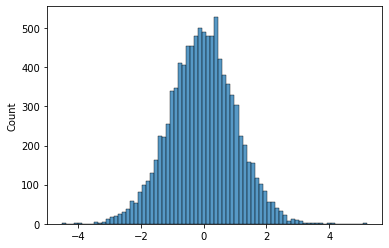

In [18]:
sns.histplot(t_scores, kde=False)

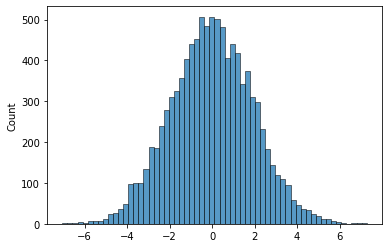

In [19]:
#Что будет если сделать sample size поменьше - для Z-score ничего не изменилось
sample_size_1 = 10
z_scores_1 = []
n = 10000

for i in range(n):
    sample_1 = np.random.choice(population, sample_size_1, False)
    sample_mean_1 = sample_1.mean()
    
    
    z_score_1 = (sample_mean_1 - mu) / se
    z_scores_1.append(z_score_1)
    
sns.histplot(z_scores_1, kde=False)

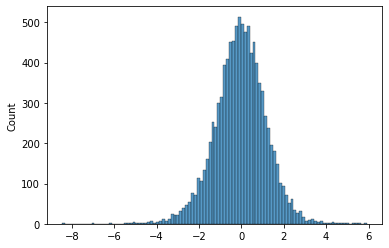

In [20]:
#Что будет если сделать sample size поменьше - а вот для t-scores
t_scores_1 = []
sample_size_1 = 10 #можно менять размер выборки, что бы посмотреть как изменяется распределение
n = 10000
for i in range(n):
    sample_12 = np.random.choice(population, sample_size_1, False)
    sample_mean_12 = sample_12.mean()
    sample_std_12 = sample_12.std()
    
    se_ = sample_std_12 / sample_size_1 ** 0.5
    t_score_1 = (sample_mean_12 - mu) / se_
    t_scores_1.append(t_score_1)

sns.histplot(t_scores_1, kde=False)

In [21]:
sample_real.mean() + 2 * se

104.38768868581649

In [22]:
sample_real.mean() - 2 * se

97.78297798085019

In [23]:
df = sample_size - 1 #число степеней свободы

In [24]:
sample_real.mean() + 2.93 * se
sample_real.mean() - 2.93 * se

96.24738274194553

# Homework

In [25]:
# Рассчитайте доверительный интервал основываясь на знании t - распределения для среднего значения температуры 
# плавления ДНК у первого вида: 

X = 89.9
sd = 11.3
n = 20

In [26]:
df = n - 1
df

19

In [35]:
# В таблице на пересечении нужных значений https://www.medcalc.org/manual/t-distribution-table.php значение = 2.093

In [36]:
# Нижний порог доверительного интервала
round(X - 2.093 * (sd / np.sqrt(n)), 2)

84.61

In [37]:
# Верхний порог доверительного интервала
round(X + 2.093 * (sd / np.sqrt(n)), 2)

95.19